This is an outdated version of the project that was scrapped.
Nothing in this file is considered part of the final project or analysis.

In [ ]:
# Crop: Sunflower seeds
# Country: Ukraine

In [ ]:
import h5py
import numpy as np
import pandas as pd
import datetime as dt

# Load Crop Data

In [ ]:
# Read in data from local file
# df_seeds = pd.read_csv('./psd_oilseeds.csv', engine='python')
df_crops = pd.read_csv('./psd_alldata.csv', engine='python')
df_crops.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0


In [ ]:
ukraine_data = df_crops[(df_crops['Country_Name'] == 'Ukraine') & (df_crops['Commodity_Description'] == 'Oilseed, Sunflowerseed')] # Limit to sunflowers in Ukraine
ukraine_data = ukraine_data.drop(columns=['Commodity_Code', 'Commodity_Description', 'Country_Code', 'Country_Name']) # Drop columns that only have 1 value

delete_index = ukraine_data[~ukraine_data['Attribute_Description'].isin(['Production', 'Yield'])].index # Only take points that correspond to production or yield
ukraine_data.drop(delete_index , inplace=True)
ukraine_data.head(20)

,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
1438235,1987,2006,6,28,Production,8,(1000 MT),2716.00
1438238,1987,2006,6,184,Yield,26,(MT/HA),1.77
1438248,1988,2006,10,28,Production,8,(1000 MT),2775.00
1438251,1988,2006,10,184,Yield,26,(MT/HA),1.77
1438261,1989,2006,10,28,Production,8,(1000 MT),2885.00
1438264,1989,2006,10,184,Yield,26,(MT/HA),1.79
1438274,1990,2011,5,28,Production,8,(1000 MT),2571.00
1438277,1990,2011,5,184,Yield,26,(MT/HA),1.58
1438287,1991,2011,5,28,Production,8,(1000 MT),2311.00
1438290,1991,2011,5,184,Yield,26,(MT/HA),1.46


In [ ]:
print(np.unique(ukraine_data['Market_Year']))
print(np.unique(ukraine_data['Calendar_Year']))
print(np.unique(ukraine_data['Month']))
# print(np.unique(ukraine_data['Attribute_ID']))
# print(np.unique(ukraine_data['Attribute_Description']))
# print(np.unique(ukraine_data['Unit_ID']))
# print(np.unique(ukraine_data['Unit_Description']))
# print(np.unique(ukraine_data['Value']))

[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
[2006 2007 2011 2012 2015 2017 2018 2021 2022]
[ 4  5  6  7 10 11 12]


In [ ]:
crop_yield = ukraine_data[ukraine_data['Attribute_Description'] == 'Yield']
crop_yield = crop_yield.drop(columns=['Attribute_ID', 'Attribute_Description', 'Unit_ID', 'Unit_Description'])
print(crop_yield.shape)

(36, 4)


In [ ]:
crop_yield.head(36)

,Market_Year,Calendar_Year,Month,Value
744636,1987,2006,6,1.77
744649,1988,2006,10,1.77
744662,1989,2006,10,1.79
744675,1990,2011,5,1.58
744688,1991,2011,5,1.46
744701,1992,2011,5,1.30
744714,1993,2011,5,1.27
744727,1994,2011,5,0.91
744740,1995,2011,5,1.42
744753,1996,2011,5,1.05


# Load GPM Data

In [ ]:
def read_file(filename):
  data = pd.read_csv('./'+filename, engine='python')
  data['time'] = data['time'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

  data['Calendar_Year'] = data.apply(lambda row: row[0].year, axis=1)
  data['Month'] = data.apply(lambda row: row[0].month, axis=1)
  data = data.drop('time', axis=1)
  return data

In [ ]:
data_06 = read_file('2006_GPM_DATA.csv')
data_07 = read_file('2007_GPM_DATA.csv')

In [ ]:
print(data_06.shape)
print(data_07.shape)

(396240, 5)
(396240, 5)


In [ ]:
data_06.head()

,lon,lat,precipitationCal,Calendar_Year,Month
0,22.249996,45.350002,2.556251,2006,5
1,22.249996,45.950008,1.982302,2006,5
2,22.249996,46.549999,2.516341,2006,5
3,22.249996,47.150005,2.321389,2006,5
4,22.249996,47.749996,4.920211,2006,5


In [ ]:
data_07.head()

,lon,lat,precipitationCal,Calendar_Year,Month
0,22.249996,45.350002,0.000000,2007,5
1,22.249996,45.950008,0.000000,2007,5
2,22.249996,46.549999,0.082405,2007,5
3,22.249996,47.150005,0.086872,2007,5
4,22.249996,47.749996,0.446236,2007,5


# Load NDVI Data

In [ ]:
# df = pd.read_csv('./NDVI_DATA.csv', sep='delimiter')

# # Retreive names of columns
# cols = df.iloc[11].values[0]
# ndvi_col_names = cols.split(',')
# print(ndvi_col_names)

# Connecting Datasets

In [ ]:
merged_06 = pd.merge(left=crop_yield, right=data_06, on=['Calendar_Year','Month'])
merged_06.head()

,Market_Year,Calendar_Year,Month,Value,lon,lat,precipitationCal
0,1987,2006,6,1.77,22.249996,45.450008,4.549330
1,1987,2006,6,1.77,22.249996,46.049999,4.652669
2,1987,2006,6,1.77,22.249996,46.650005,2.843415
3,1987,2006,6,1.77,22.249996,47.249996,0.235453
4,1987,2006,6,1.77,22.249996,47.850002,0.344278


In [ ]:
len(merged_06)

389814

# Testing Data

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# X = merged_inner.drop(columns=['Value'])
# y = merged_inner['Value']
# #y_nozeros = y[y != 0]

# plt.figure(figsize=(8,6))
# s = sns.histplot(y, bins = 10000)
# s.set_xlabel("Value", fontsize = 20)
# s.set_ylabel("Density", fontsize = 20)
# #plt.xlim(0, 5) # Limiting to small values for now, since this is where nearly all the entries lie
# title = plt.title("Value Histogram", fontsize = 20)

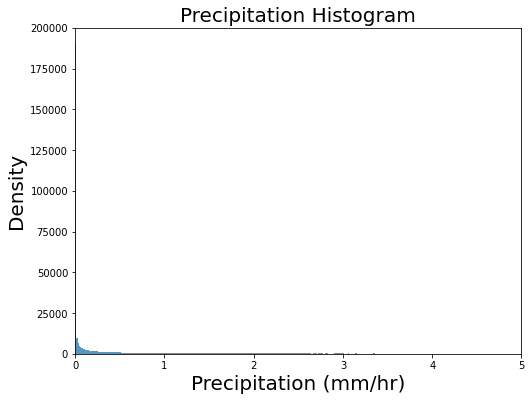

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data_06.drop(columns=['precipitationCal'])
y = data_06['precipitationCal']
# y_nozeros = y[y != 0]

plt.figure(figsize=(8,6))
s = sns.histplot(y, bins = 10000)
s.set_xlabel("Precipitation (mm/hr)", fontsize = 20)
s.set_ylabel("Density", fontsize = 20)
plt.xlim(0, 5) # Limiting to small values for now, since this is where nearly all the entries lie
title = plt.title("Precipitation Histogram", fontsize = 20)

In [ ]:
len(np.unique(data_06['precipitationCal']))

227128